In [1]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from pypsa.linopf import (get_var, define_constraints, linexpr, join_exprs,
                          network_lopf, ilopf)

In [2]:
basedir = "../" 
#basedir = "~/mnt/lin/pypsa-eur/"

In [3]:
# Perfect foresight:  sovled network
n2013 = pypsa.Network(basedir + "networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [4]:
# Perfect foresight:  sovled network
n_solved = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [5]:
# Perfect foresight:  sovled operation network
n_op = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_op.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_op.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [6]:
# rolling horizon, without setting bidding price
n_rh = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_rh.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_rh.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [7]:
# rolling horizon for each snapshot
n_rh_sp_3h = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_3h_rh_sp.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_3h_rh_sp.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [8]:
# rolling horizon for each snapshot
n_rh_sp_3h_backup = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_3h_rh_sp_backup.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_3h_rh_sp_backup.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [9]:
## rolling horizon for two weeks and one week overlap
n_rh_sp_2w = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_2w_rh_sp.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_2w_rh_sp.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


In [10]:
## rolling horizon for two weeks and one week overlap
n_rh_sp_2w_backup = pypsa.Network(basedir + "results/networks/2013/elec_s_40_ec_lv1.0_Co2L0p0-3H_2w_rh_sp_backup.nc")

INFO:pypsa.io:Imported network elec_s_40_ec_lv1.0_Co2L0p0-3H_2w_rh_sp_backup.nc has buses, carriers, generators, global_constraints, lines, links, loads, stores


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='name'>

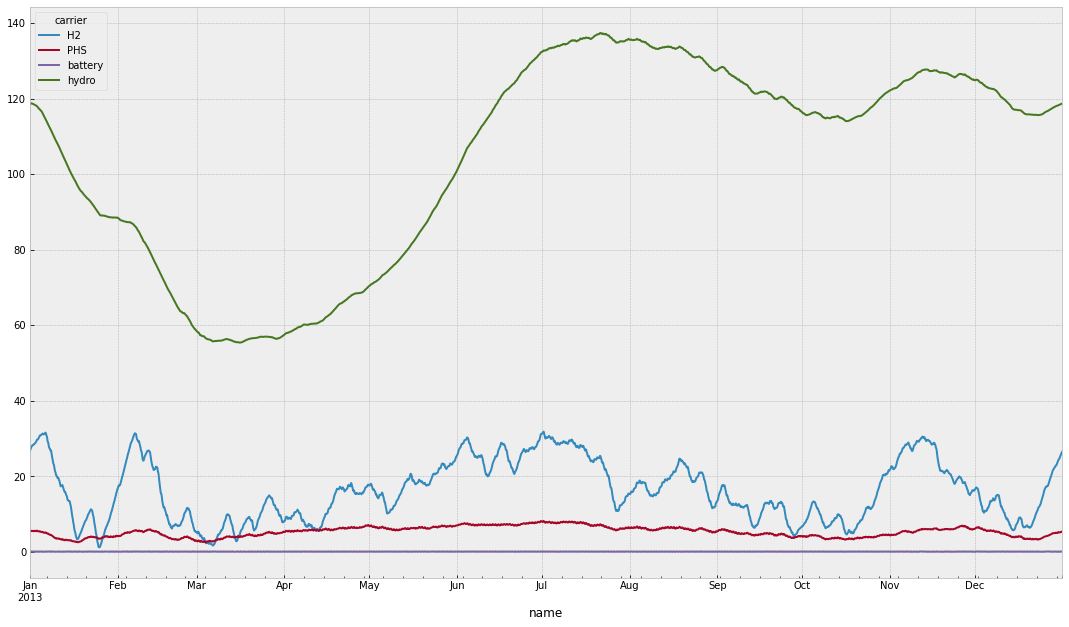

In [11]:
n = n_op

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

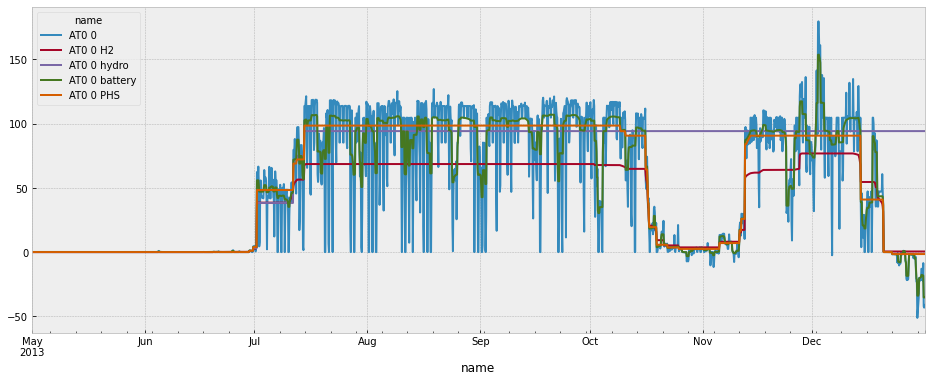

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches((16,6))
n_op.buses_t.marginal_price.loc[:,["AT0 0","AT0 0 H2", "AT0 0 hydro", "AT0 0 battery", "AT0 0 PHS"]].loc["2013-05-01 00:00:00":,:].plot(ax=ax)

<AxesSubplot:xlabel='name'>

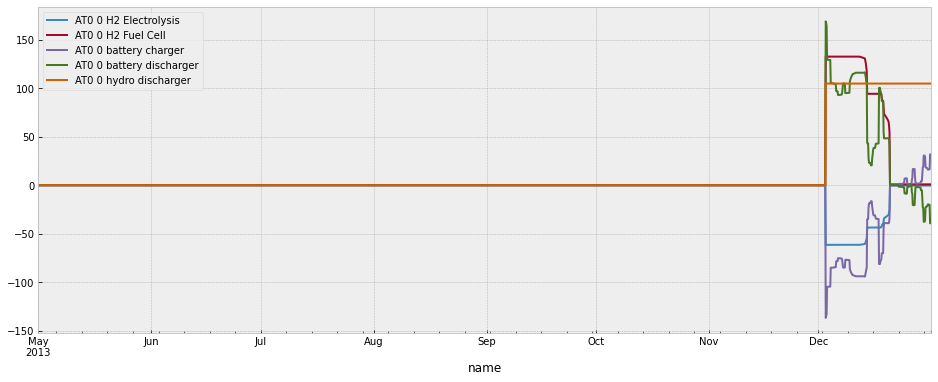

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches((16,6))
n_rh_sp_2w.links_t.marginal_cost.loc["2013-05-01 00:00:00":,["AT0 0 H2 Electrolysis","AT0 0 H2 Fuel Cell", "AT0 0 battery charger", "AT0 0 battery discharger", "AT0 0 hydro discharger"]].plot(ax=ax)    

<AxesSubplot:xlabel='name'>

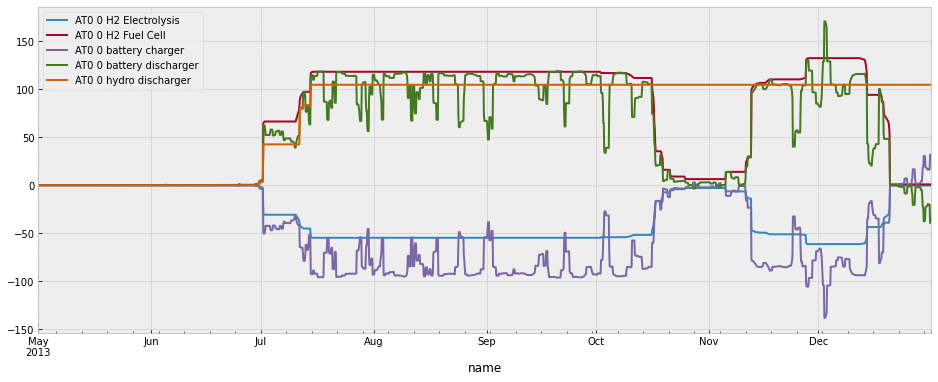

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches((16,6))
n_rh_sp_2w_backup.links_t.marginal_cost.loc["2013-05-01 00:00:00":,["AT0 0 H2 Electrolysis","AT0 0 H2 Fuel Cell", "AT0 0 battery charger", "AT0 0 battery discharger", "AT0 0 hydro discharger"]].plot(ax=ax)
    

<AxesSubplot:xlabel='name'>

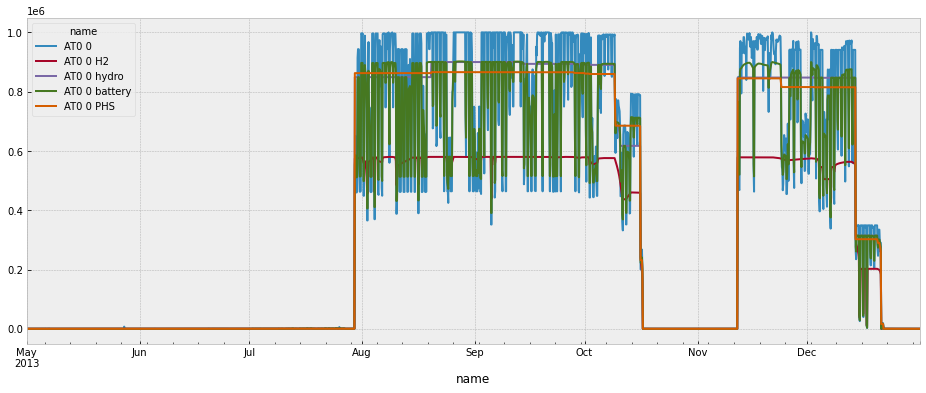

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches((16,6))
n_rh_sp_2w_backup.buses_t.marginal_price.loc[:,["AT0 0","AT0 0 H2", "AT0 0 hydro", "AT0 0 battery", "AT0 0 PHS"]].loc["2013-05-01 00:00:00":,:].plot(ax=ax)

<AxesSubplot:xlabel='name'>

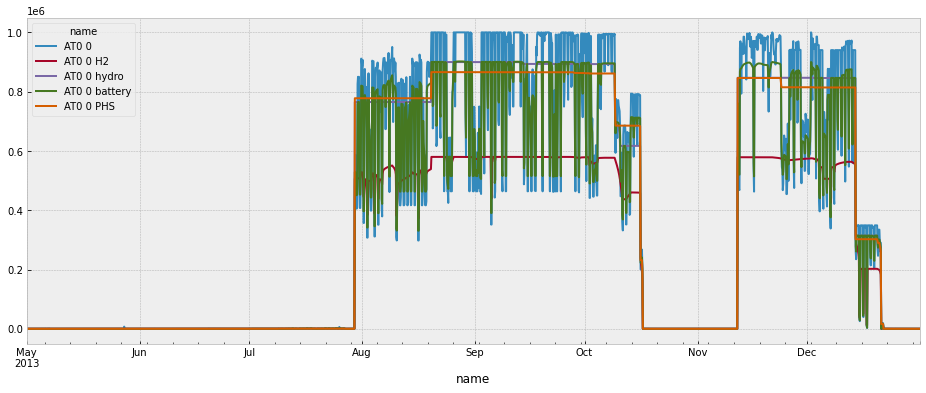

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches((16,6))
n_rh_sp_2w.buses_t.marginal_price.loc[:,["AT0 0","AT0 0 H2", "AT0 0 hydro", "AT0 0 battery", "AT0 0 PHS"]].loc["2013-05-01 00:00:00":,:].plot(ax=ax)

<AxesSubplot:xlabel='name'>

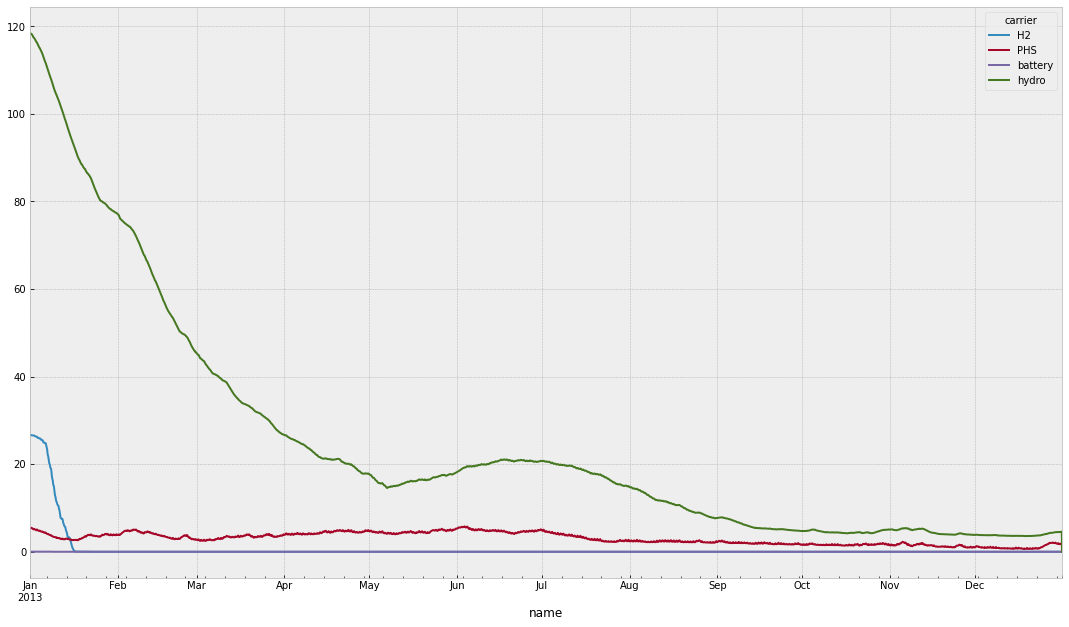

In [17]:
n = n_rh_sp_3h

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

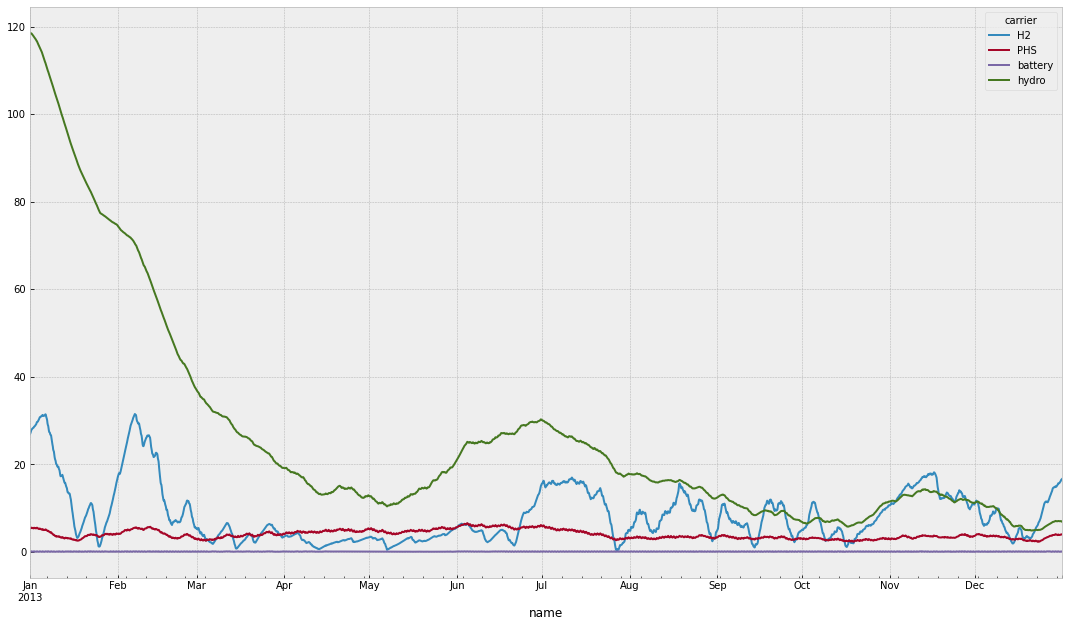

In [18]:
n = n_rh_sp_2w

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

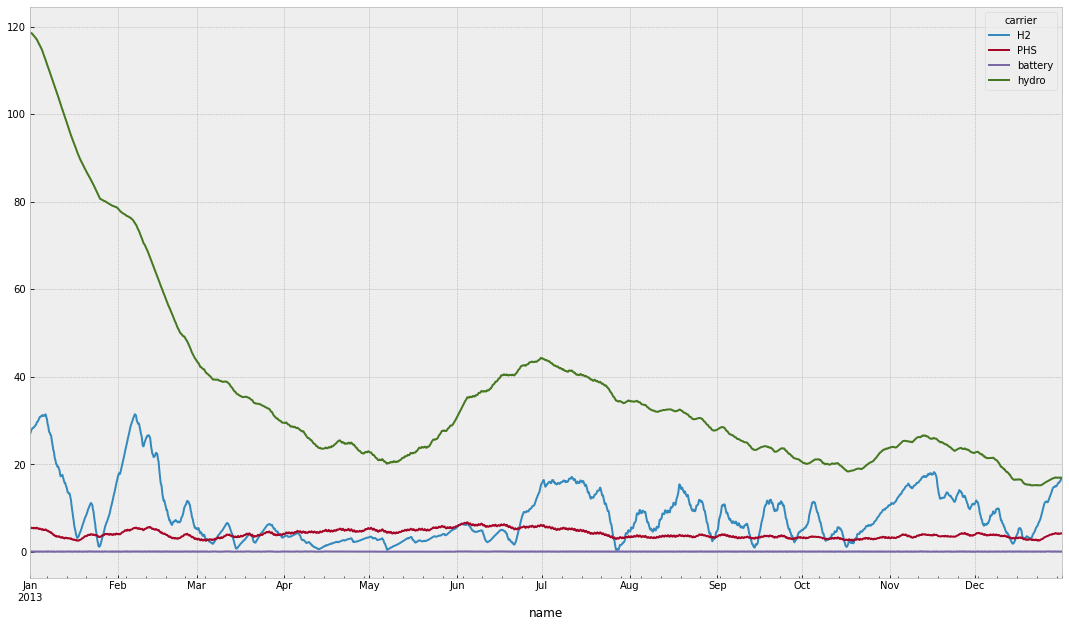

In [19]:
n = n_rh_sp_2w_backup

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

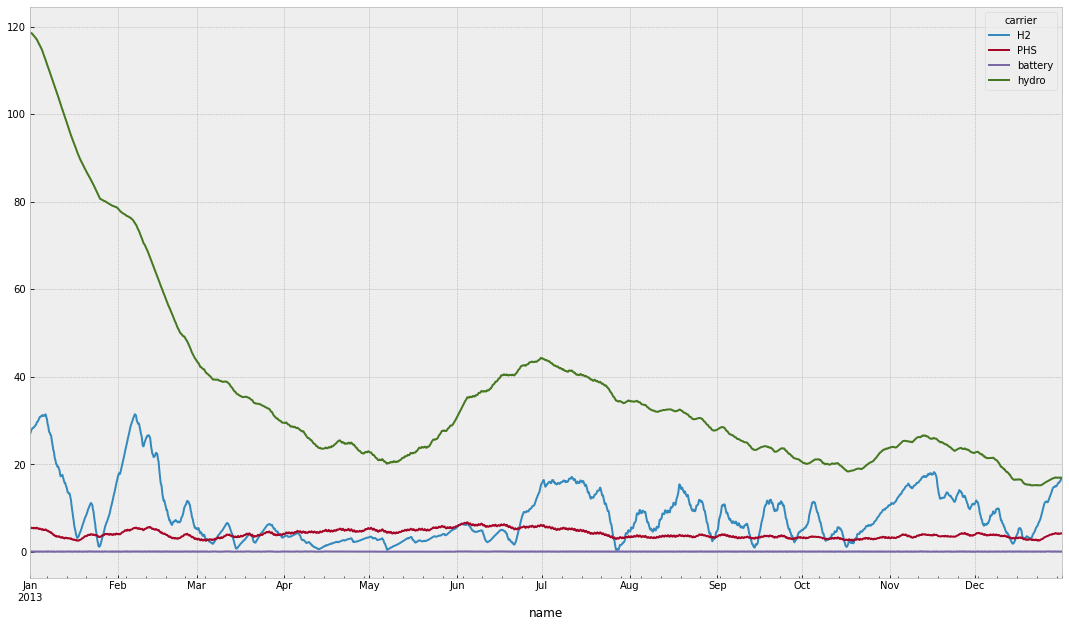

In [20]:
n = n_rh_sp_2w_backup

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)

<AxesSubplot:xlabel='name'>

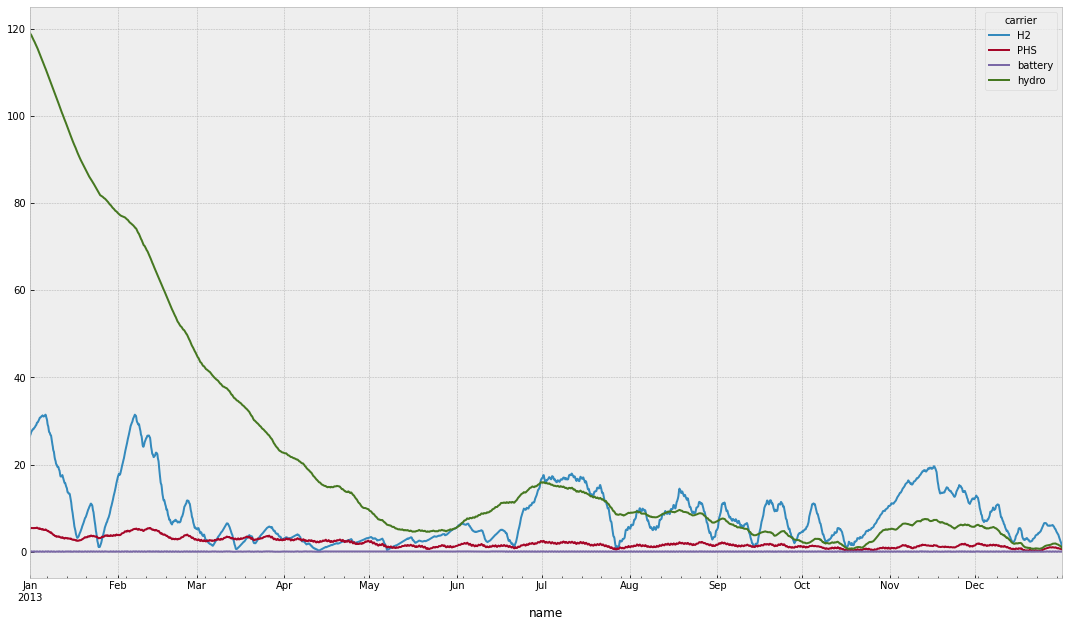

In [21]:
n = n_rh

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5, forward=True)

e = pd.concat((n.stores_t.e.groupby(n.stores.carrier,axis=1).sum(),
               n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier,axis=1).sum()),axis=1)

e = e/1e6
#e.drop(e.columns[e.abs().max() < 1e6],axis=1,inplace=True)

e.plot(ax=ax)